<a href="https://colab.research.google.com/github/hurshd0/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width="600">
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">


## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Anatomy of a Matplotlib Plot

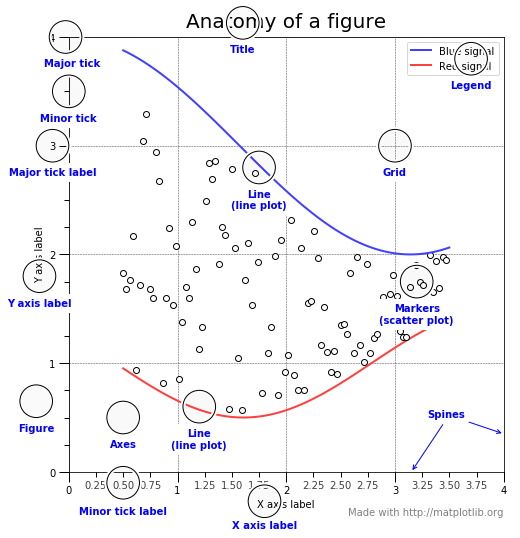

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

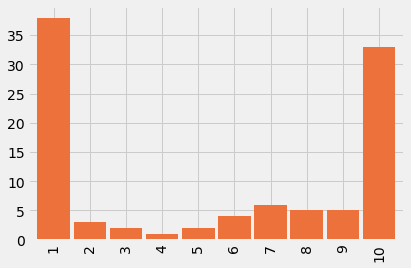

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='#ED713A', width=0.9);

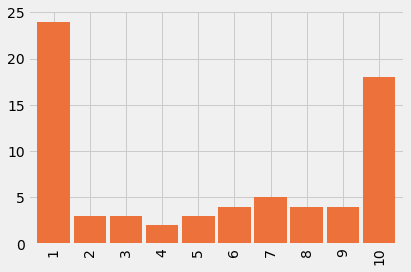

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='#ED713A', width=0.9);

## Annotate with text

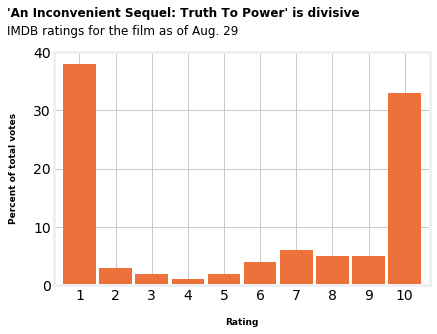

In [5]:
# Create figure
fig = plt.figure()

# Set figure background color
fig.patch.set_facecolor('white')

# Set bar color and width
ax = fake.plot.bar(color="#ED713A", width=0.9)

# set inner Axes color
ax.set(facecolor='white')

# Set title and subtitle
ax.text(x=-2, y=46, s="'An Inconvenient Sequel: Truth To Power' is divisive", fontweight="bold", fontsize='12')
ax.text(x=-2, y=43, s="IMDB ratings for the film as of Aug. 29", fontsize=12)

# Set x and y-axis ticls
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0,50,10))

# Set axis labels
plt.ylabel(ylabel='Percent of total votes', fontsize=9, fontweight='bold', labelpad=15)
plt.xlabel(xlabel='Rating', fontsize=9, fontweight='bold', labelpad=15)

plt.show();

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [7]:
pd.set_option('display.max_columns', 50)
print(df.shape)
df.head(20)

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2
5,2017-07-17 12:28:33.970009,108,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.2,6.2,9,37,0,3,1,1,3,6,2,6,49,34.3,0.0,2.8,0.9,0.9,2.8,5.6,1.9,5.6,45.4
6,2017-07-17 12:28:34.199847,17,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.7,8.4,10,2,0,0,0,1,0,0,2,0,12,11.8,0.0,0.0,0.0,5.9,0.0,0.0,11.8,0.0,70.6
7,2017-07-17 12:28:34.381001,196,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,4.3,5.0,2,92,7,3,1,6,4,4,4,12,63,46.9,3.6,1.5,0.5,3.1,2.0,2.0,2.0,6.1,32.1
8,2017-07-17 12:28:34.590224,164,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,4.1,4.5,1,85,6,3,1,5,3,4,3,12,42,51.8,3.7,1.8,0.6,3.0,1.8,2.4,1.8,7.3,25.6
9,2017-07-17 12:28:34.807101,25,Females Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-fe...,7.2,8.2,10,5,0,0,0,0,0,0,0,0,20,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0


In [8]:
df.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [10]:
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [11]:
df.set_index('timestamp', inplace=True)
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [12]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail(30)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 18:20:06.215486,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:30:06.738669,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:40:05.771150,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:50:06.051326,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:00:06.002542,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:10:06.066863,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:20:06.286871,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:30:06.395003,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:40:06.372808,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8


In [13]:
df['category'].value_counts()

Males Aged 45+        4216
IMDb users            4216
Females Aged 18-29    4216
Males                 4216
Females Aged 45+      4216
IMDb staff            4216
Non-US users          4216
Aged 30-44            4216
Top 1000 voters       4216
Males Aged 18-29      4216
Females Aged 30-44    4216
Males under 18        4216
Aged 18-29            4216
US users              4216
Aged 45+              4216
Aged under 18         4216
Males Aged 30-44      4216
Females               4216
Females under 18      4165
Name: category, dtype: int64

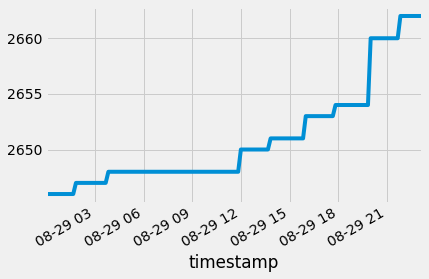

In [14]:
lastday_filtered.respondents.plot()

In [15]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [16]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [17]:
plot_data = final[pct_columns].T
plot_data.index = range(1, 11)
plot_data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
pd.set_option('display.max_columns', 50)
print(df.shape)
df.tail()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [20]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail(30)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 18:20:06.215486,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:30:06.738669,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:40:05.771150,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:50:06.051326,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:00:06.002542,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:10:06.066863,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:20:06.286871,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:30:06.395003,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:40:06.372808,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8


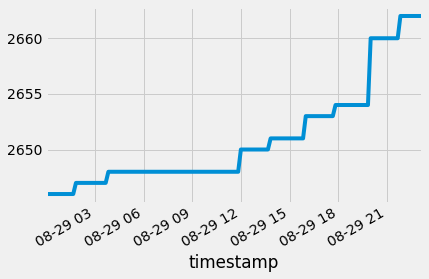

In [21]:
lastday_filtered.respondents.plot()

In [22]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [23]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [24]:
plot_data = final[pct_columns].T
plot_data.index = range(1, 11)
plot_data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [0]:
# !rm -f /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/decimamono-light-webfont.ttf
# !wget https://github.com/theprojectsomething/rory-gardiner.com/raw/master/fonts/decimamono-light-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf 

In [0]:
# !ls /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

In [27]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [0]:
import matplotlib
matplotlib.font_manager._rebuild()

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Decima Mono'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


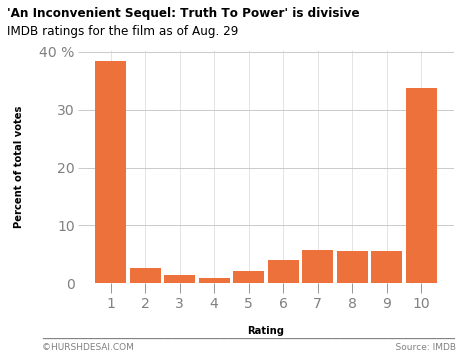

In [29]:
plt.style.use('fivethirtyeight')

# Create figure
fig = plt.figure()

# set figure background color
fig.patch.set_facecolor('white')

# get axis
ax = fig.add_subplot(1, 1, 1)

# plot, set bar color and width
ax.bar(plot_data['2017-08-29 23:10:06.218251'].index, plot_data['2017-08-29 23:10:06.218251'].values, color='#ED713A', width=0.90)


# set inner Axes color
ax.set(facecolor='white')

# Set title and subtitle
ax.text(x=-2, y=46, s="'An Inconvenient Sequel: Truth To Power' is divisive", fontweight="bold", fontsize='12')
ax.text(x=-2, y=43, s="IMDB ratings for the film as of Aug. 29", fontsize=12)

# Set x and y-axis ticks
ax.set_xticks(range(1,11))
ax.set_xticklabels(range(1,11), rotation=0, color='grey', fontname='Decima Mono')
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(labels = ['0', '10', '20', '30', '40 %'], fontname='Decima Mono', color='grey')

# Set tickparams
plt.tick_params(axis='x', length=10, grid_linewidth=0.5, color='gray')

# Set axis labels
plt.ylabel(ylabel='Percent of total votes', fontsize=10, fontweight='bold', labelpad=15)
plt.xlabel(xlabel='Rating', fontsize=10, fontweight='bold', labelpad=15)

# Remove box
plt.box(on=None)

# Add signature bar
ax.text(x=-1, y=-9.25, s = '___________________________________________________________', color = 'grey'
)
ax.text(x=-1, y=-11.5, s = '©HURSHDESAI.COM                                                                                           Source: IMDB', fontsize = 9, color = 'grey')
plt.show();

In [30]:
display(example)

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).











In [0]:
# !wget http://samhda.s3-us-gov-west-1.amazonaws.com/s3fs-public/field-uploads-protected/studies/NSDUH-2012/NSDUH-2012-datasets/NSDUH-2012-DS0001/NSDUH-2012-DS0001-bundles-with-study-info/NSDUH-2012-DS0001-bndl-data-tsv.zip
# !unzip NSDUH-2012-DS0001-bndl-data-tsv.zip
# !ls -lh

In [32]:
!head NSDUH_2012_Tab.tsv

head: cannot open 'NSDUH_2012_Tab.tsv' for reading: No such file or directory


In [33]:
!tail NSDUH_2012_Tab.tsv

tail: cannot open 'NSDUH_2012_Tab.tsv' for reading: No such file or directory


In [34]:
df = pd.read_csv('NSDUH_2012_Tab.tsv', sep='\t')
df.head()

FileNotFoundError: ignored

![](https://i.imgur.com/FKrXRql.png)

![]()

In [0]:
small_df = df[['RITMPHEN', 'AGE2']].copy()
small_df.head()

In [0]:
small_df.isnull().sum()

In [0]:
small_df.info()

In [0]:
def age_cat(num):
    if num >= 7 and num <= 12:
        return '18-25'
    elif num >= 13 and num <= 14:
        return '26-34'
    elif num == 15:
        return '35-49'
    elif num == 16:
        return '50-64'
    elif num == 17:
        return '65+'
    else:
        return np.NaN

small_df['AGE2'] = small_df['AGE2'].apply(age_cat)

In [0]:
small_df['AGE2'].value_counts()

In [0]:
small_df.dropna(axis = 0, inplace = True)
small_df.reset_index(drop=True, inplace = True)
small_df.info()

In [0]:
small_df.shape

In [0]:
small_df.isnull().sum()

In [0]:
small_df.head()

![](https://i.imgur.com/6GyyOrE.png)





In [0]:
def ritalin_numeric(num):
    if num == 1 or num == 3:
        return 1
    elif num == 2 or num == 81 or num == 91:
        return 0
    else:
        return np.NaN
    
small_df['RITMPHEN'] = small_df['RITMPHEN'].apply(ritalin_numeric)  

In [0]:
small_df.isnull().sum()

In [0]:
small_df.info()

In [0]:
small_df['RITMPHEN'].value_counts()

In [0]:
small_df.groupby(['AGE2', 'RITMPHEN'])['RITMPHEN'].count().unstack()

In [0]:
small_df[small_df['RITMPHEN'] == 1].groupby('AGE2')['RITMPHEN'].count() / small_df[small_df['RITMPHEN'] == 1].groupby('AGE2')['RITMPHEN'].count().sum()

In [0]:
ct = pd.crosstab(small_df['RITMPHEN'], small_df['AGE2'], normalize='index') * 100
ct

In [0]:
colors = ["#A62963", "#D93E85", "#DC82B5", "#C6A5CC", "#D2C6DA"]

fig = plt.figure(figsize=(10, 6))
ax = ct.plot(kind='barh', stacked=True, legend=False, color=colors)

# Customize tick params
ax.grid(False)

# Set title and subtitle
ax.text(x=-3, y=2, s="Age Breakdown of Ritalin Users", fontweight="bold", fontsize='15')
ax.text(x=-3, y=2, s="", fontsize=12)

ax.text(x=-2, y=1.5, s="Respondents who had used Ritalin", fontweight="bold", fontsize='15')

In [0]:
people = ('A','B','C','D','E','F','G','H')
segments = 4

# generate some multi-dimensional data & arbitrary labels
data = 3 + 10* np.random.rand(segments, len(people))
percentages = (np.random.randint(5,20, (len(people), segments)))
y_pos = np.arange(len(people))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(people)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i%len(colors)], align='center', 
      left=left))
    # accumulate the left-hand offsets
    left += d

# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Distance')

plt.show()

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!